In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.font_manager as fm
path =  '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()
matplotlib.rc('font',family=fontprop)
matplotlib.rc('axes', unicode_minus = False)

# Titanic 데이터 불러오기

In [2]:
df_titanic = pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/titanic.csv", encoding ='euc-kr')
df_titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  30.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

# 2-1.데이터 특성 확인하기

In [3]:
#데이터 속성 --> Cabin, Embarked는 결측치가 존재
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#데이터 행,열 형태 --> 12개의 칼럼과 891개의 데이터로 이루어져 있다.
df_titanic.shape

(891, 12)

# 2-2.기술 통계량 확인하기

In [5]:
#데이터 요약  -->  각 칼럼과 생존간의 관계 파악
df_titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.758889    0.523008   
std     257.353842    0.486592    0.836071   13.002570    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   30.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
#결측치 확인
df_titanic.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False  False  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [7]:
#결측치 빈도 집계 --> Cabin 687개, Embarked 2개 결측치가 존재
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

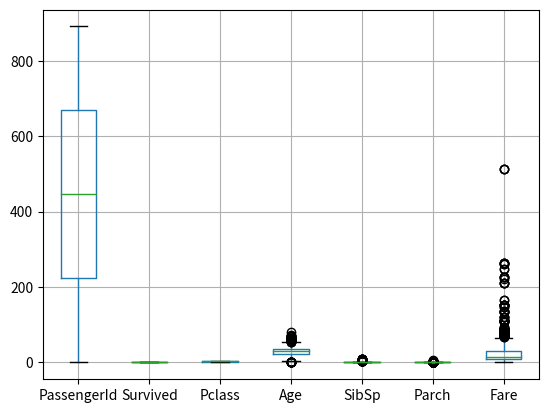

In [8]:
#이상치 확인 --> 나이, 요금은 특성상 이상치에 벗어나도 무시
df_titanic.boxplot()

# 3. 데이터 전처리

In [9]:
# 채워진 Cabin열 확인 --> 다른 열과 연관성을 찾기 어려움 --> 삭제
df_titanic[df_titanic['Cabin'].isnull()==False]

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
1        0  PC 17599  71.2833          C85        C  
3        0    113803  53.1000         C123        S  
6        0     17463  51.8625          E46        S  
10       1   PP 9549  16.7000           G6        S  
11       0    113783  26.5500         C103        S  
..     ...       ...      ...          ...      ...  
871      1     11751  52.5542          D35        S  
872      0       695   5.0000  B51 B53 B55        S  
879      1     11767  83.1583          C50        C  
887      0    112053  30.0000          B42        S  
889      0    111369  30.0000         C148        C  

[204 rows x 12 columns]

In [10]:
# 최빈값 확인 --> Cabin의 최빈값 = B96,B98 , Embarked의 최빈값 : S 
# 평균값은 객실번호, 승객이 탑승한곳 이기때문에 통계적 특성을 가지고 있지 않아 구할 수 없음 
df_titanic.describe(include='all')

PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   891.000000  891.000000  891.000000     891  891.000000      204   
unique         NaN         NaN         NaN     681         NaN      147   
top            NaN         NaN         NaN  347082         NaN  B96 B98   
freq           NaN         NaN         NaN       7         NaN        4   
mean     29.758889    0.523008    0.381594     NaN   32.204208      NaN   
std      13.002570    1.102743    0.806057     NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN   
25%      22.000000    0.000000    0.000000     NaN    7.910400      NaN   
50%      30.000000    0.000000    0.000000     NaN   14.454200      NaN   
75%      35.000000    1.000000    0.000000     NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000     NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [11]:
#Cabin 결측치를 최빈값 'B96 B98'로 대체
df_titanic['Cabin'].describe()
df_titanic.fillna('B96 B98' , inplace=True)

In [12]:
#Embarked 결측치를 최빈값 'S'로 대체
df_titanic['Embarked'].fillna('S',inplace=True)

In [13]:
#객실번호 첫자리만 별도의 변수로 생성
df_titanic['Cabin_class']=df_titanic['Cabin'].str.get(i=0)

<AxesSubplot:xlabel='Family', ylabel='count'>

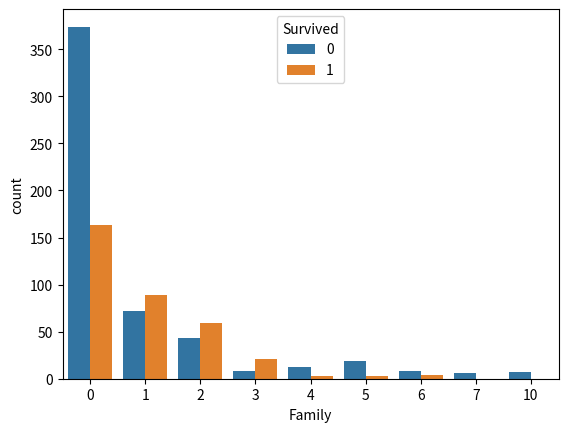

In [14]:
#가족수 계산해서 변수 생성
df_titanic['Family'] = df_titanic['SibSp'] + df_titanic['Parch']
sns.countplot(data = df_titanic, x='Family', hue='Survived')
# 가족이 없는 경우 사망률이 높음 
#  family의 1~2구간이 생존률이 다른 구간에 비해 비교적 높음

In [15]:
#나이에 대한 파생변수 생성
df_titanic['Age_bin'] = pd.cut(df_titanic['Age'], bins=[0, 14, 28, 45, 56, 100],
                            include_lowest = True,
                            labels = ['Child', 'Young', 'Middle', 'Prime', 'Old'])
# 14세 이하 child
# 28세 이하 young
# 45세 이하 middle
# 56세 이하 prime
# 나머지 old 로 구간값 재설정 ~ 아래 데이터 표의 Age_bin을 통해 확인가능
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked Cabin_class  Family  \
0      0         A/5 21171   7.2500  B96 B98        S           B       1   
1      0          PC 17599  71.2833      C85        C           C       1   
2      0  STON/O2. 3101282   7.9250  B96 B98        S           B       0   
3      0            113803  53.1000     C123        S           C       1   
4      0            373450   8.0500  B96 B98        S           B       0   

  Age_bin  
0   Young  
1  Middle  
2   Young  
3  Middle  
4  Middle

In [16]:
#요금 구간화
df_titanic['Fare_bin'] = pd.cut(df_titanic['Fare'], bins=[0, 50, 100, 150, 200, 600],
                            include_lowest = True,
                            labels = ['0', '1', '2', '3', '4'])
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked Cabin_class  Family  \
0      0         A/5 21171   7.2500  B96 B98        S           B       1   
1      0          PC 17599  71.2833      C85        C           C       1   
2      0  STON/O2. 3101282   7.9250  B96 B98        S           B       0   
3      0            113803  53.1000     C123        S           C       1   
4      0            373450   8.0500  B96 B98        S           B       0   

  Age_bin Fare_bin  
0   Young        0  
1  Middle        1  
2   Young        0  
3  Middle        1  
4  Middle        0

In [17]:
df_titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  30.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare    Cabin Embarked Cabin_class  Family  \
0        0         A/5 21171   7.2500  B96 B98        S           B       1   
1        0          PC 17599  71.2833      C85        C           C       1   
2        0  STON/O2. 3101282   7.9250  B96 B98        S           B       0   
3        0            113803  53.1000     C123        S           C       1   
4        0            373450   8.0500  B96 B98        S           B       0   
..     ...               ...      ...      ...      ...         ...     ...   
886      0            211536  13.0000  B96 B98        S           B       0   
887      0            112053  30.0000      B42        S           B       0   
888      2        W./C. 6607  23.4500  B96 B98        S           B       3   
889      0            111369  30.0000     C148        C           C       0   
890      0            370376   7.7500  B96 B98        Q           B       0   

    Age_bin Fare_bin  
0     Young        0  
1    Middle        1  
2     Young        0  
3    Middle        1  
4    Middle        0  
..      ...      ...  
886   Young        0  
887   Young        0  
888  Middle        0  
889   Young        0  
890  Middle        0  

[891 rows x 16 columns]

# 4. 그래프 분석

Text(0.5, 0, '승객 등급')

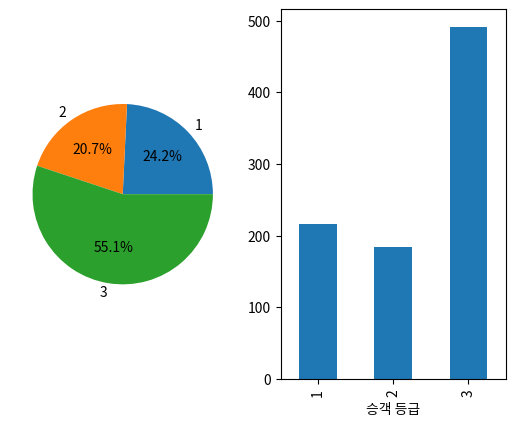

In [53]:
#Pclass
fig0,axe0=plt.subplots(nrows=1,ncols=2)
df_count0=df_titanic["Pclass"].value_counts()
df_count0.sort_index(inplace=True);
axe0[0].pie(df_count0, labels=df_count0.index.tolist(),autopct ='%.1f%%')
df_count0.plot.bar()
plt.xlabel('승객 등급')

Text(0.5, 0, '성별')

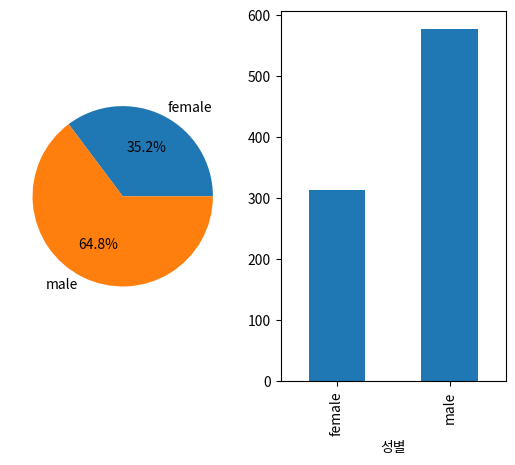

In [55]:
#Sex
fig1,axe1=plt.subplots(nrows=1,ncols=2)
df_count1=df_titanic["Sex"].value_counts()
df_count1.sort_index(inplace=True);
a=df_count1.index.tolist()
axe1[0].pie(df_count1, labels=a, autopct ='%.1f%%')
df_count1.plot.bar()
plt.xlabel('성별')

Text(0.5, 0, '승객이 탑승한 곳')

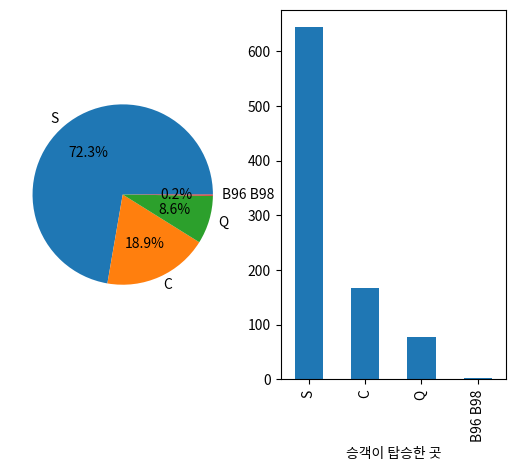

In [57]:
#Embarked
fig4,axe4=plt.subplots(nrows=1,ncols=2)
df_count4=df_titanic["Embarked"].value_counts()
df_count1.sort_index(inplace=True);
a1=df_count4.index.tolist()
axe4[0].pie(df_count4, labels=a1, autopct ='%.1f%%')
df_count4.plot.bar()
plt.xlabel('승객이 탑승한 곳')

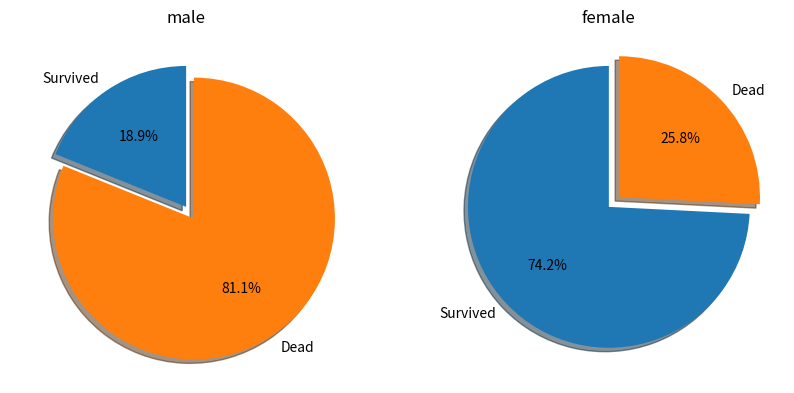

In [43]:
labels = 'Survived', 'Dead'
sizes_m = [len(df_titanic.loc[ (df_titanic["Sex"]=='male') & (df_titanic["Survived"]==1)]), \
         len(df_titanic.loc[ (df_titanic["Sex"]=='male')& (df_titanic["Survived"]==0)]) ]

sizes_f = [len(df_titanic.loc[ (df_titanic["Sex"]=='female') & (df_titanic["Survived"]==1)]), \
         len(df_titanic.loc[ (df_titanic["Sex"]=='female')& (df_titanic["Survived"]==0)]) ]

explode = (0, 0.1)

fig = plt.figure()
fig.set_size_inches(10,5)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(sizes_m, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('male')

ax2.pie(sizes_f, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.set_title('female')

plt.show()

- 성별 생율율 파이차트 --> 남성의 생존율이 여성의 생존률 보다 낮율

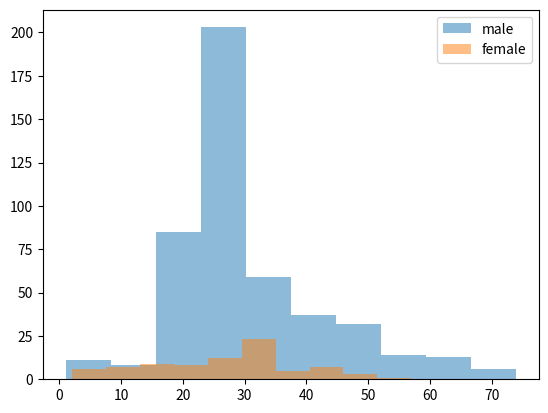

In [21]:
plt.hist(df_titanic.loc[(df_titanic["Sex"]=="male")&(df_titanic["Survived"]==0)]["Age"],label="male",alpha=0.5)
plt.hist(df_titanic.loc[(df_titanic["Sex"]=="female")&(df_titanic["Survived"]==0)]["Age"],label="female",alpha=0.5)
plt.legend()

- 20~30대 남성 사망자 수가 많음을 확인.

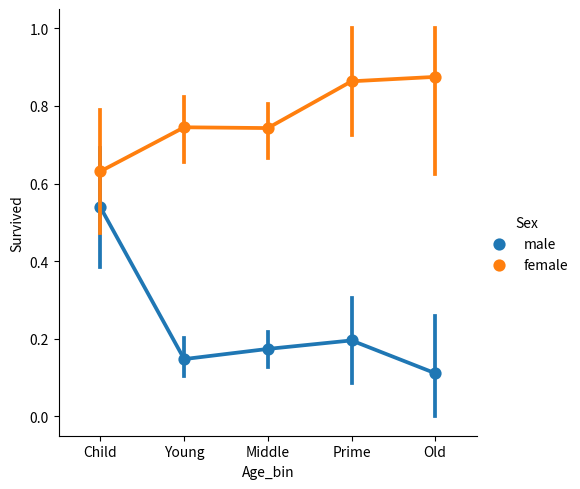

In [22]:
sns.factorplot('Age_bin', 'Survived', hue='Sex', data=df_titanic)

- 연령대별 남성, 여성 생존율 비교

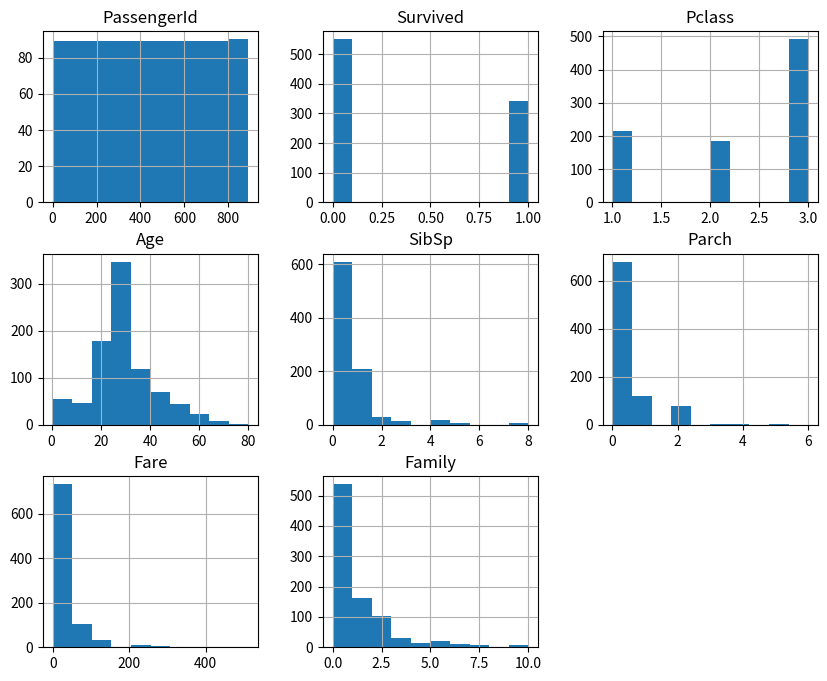

In [44]:
df_titanic.hist(figsize=(10,8));
#  수치형 데이터 히스토그램으로 생성

- Age,SibSp,Parch,Fare가 연속형 변수로서 적당

Text(0.5, 23.52222222222222, '탑승 연령대')

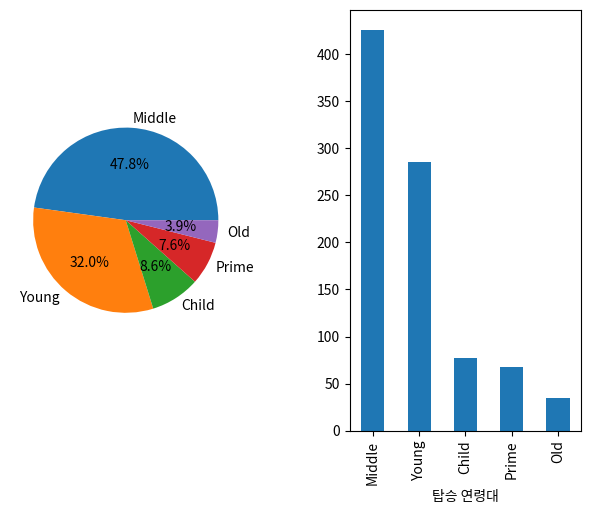

In [26]:
#Age class
fig5,axe5=plt.subplots(nrows=1,ncols=2)
plt.tight_layout(w_pad=5,h_pad=5)
df_count5=df_titanic["Age_bin"].value_counts()
a5=df_count5.index.tolist()
axe5[0].pie(df_count5, labels=a5, autopct ='%.1f%%')
df_count5.plot.bar()
plt.xlabel('탑승 연령대')

Text(0.5, 23.52222222222222, '객실 클래스')

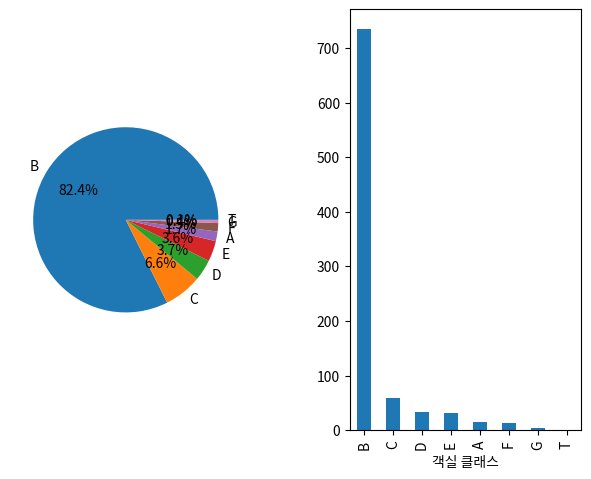

In [51]:
#Cabin class
fig6,axe6=plt.subplots(nrows=1,ncols=2)
plt.tight_layout(w_pad=5,h_pad=5)
df_count6=df_titanic["Cabin_class"].value_counts()
a6=df_count6.index.tolist()
axe6[0].pie(df_count6, labels=a6, autopct ='%.1f%%')
df_count6.plot.bar()
plt.xlabel('객실 클래스')

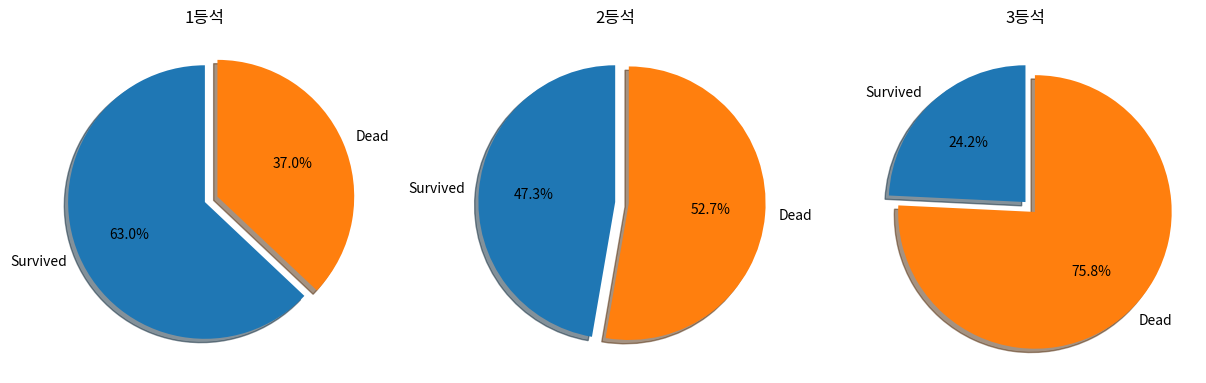

In [63]:
labels = 'Survived', 'Dead'
sizes_1 = [len(df_titanic.loc[ (df_titanic["Pclass"]==1) & (df_titanic["Survived"]==1)]), \
         len(df_titanic.loc[ (df_titanic["Pclass"]==1)& (df_titanic["Survived"]==0)]) ]

sizes_2 = [len(df_titanic.loc[ (df_titanic["Pclass"]==2) & (df_titanic["Survived"]==1)]), \
         len(df_titanic.loc[ (df_titanic["Pclass"]==2)& (df_titanic["Survived"]==0)]) ]

sizes_3 = [len(df_titanic.loc[ (df_titanic["Pclass"]==3) & (df_titanic["Survived"]==1)]), \
         len(df_titanic.loc[ (df_titanic["Pclass"]==3)& (df_titanic["Survived"]==0)]) ]

explode = (0, 0.1) 

fig = plt.figure()
fig.set_size_inches(15,5)
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.pie(sizes_1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('1등석')

ax2.pie(sizes_2, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.set_title('2등석')

ax3.pie(sizes_3, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax3.set_title('3등석')

plt.show()

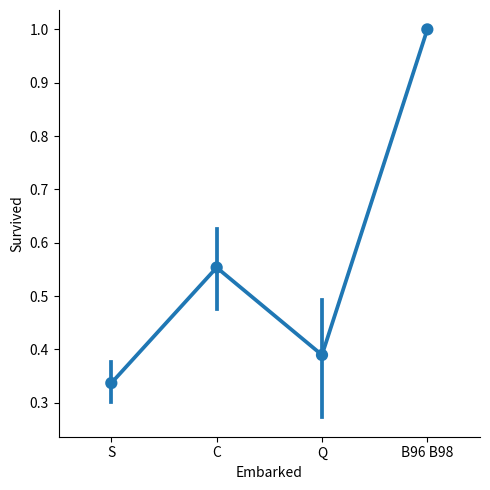

In [70]:
sns.factorplot('Embarked', 'Survived', data=df_titanic)
plt.show()

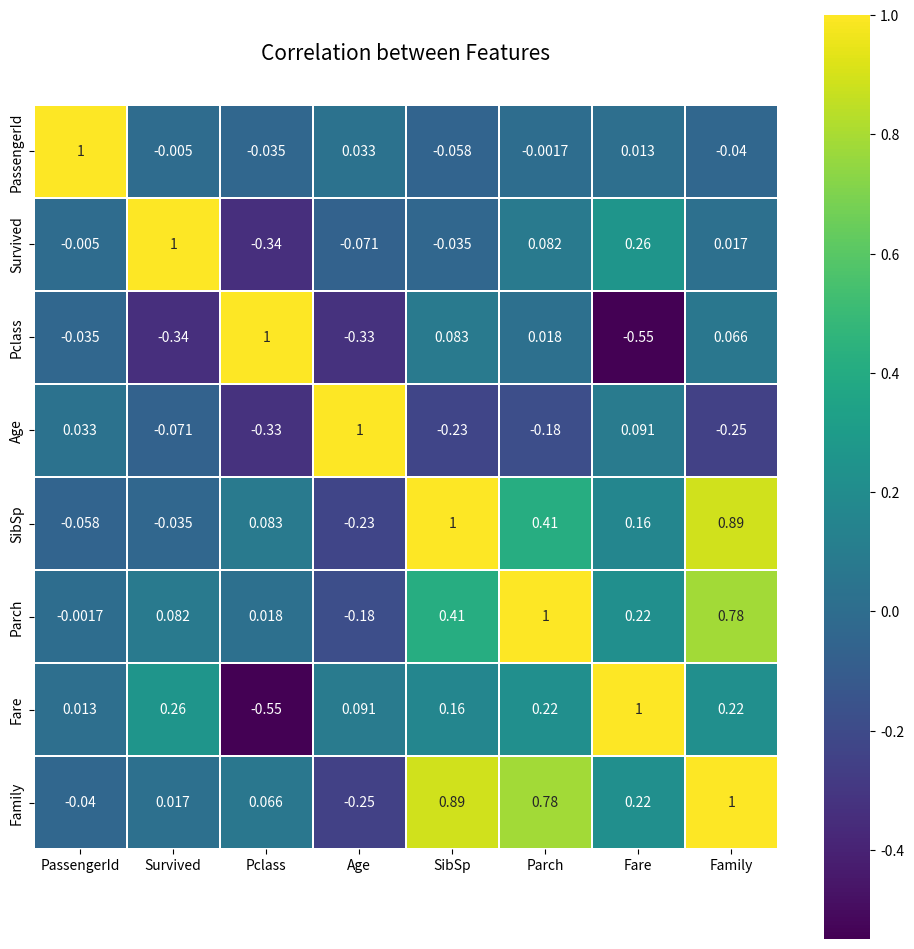

In [69]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation between Features', y=1.05, size = 15)
sns.heatmap(df_titanic.corr(),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

plt.show()

- 결론
        성: 남성>여성
        나이: child는 생존율이 높음
        등급: 1>2>3
        탑승한 곳 : S가 가장낮음
        객실 번호 : B가 가장높음

In [28]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 실습2) 기술통계1

In [29]:
ds_mycars=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/mycars.csv")
ds_mycars.head()

manufacturer model  displacement  year  cylinder automatic driving  mpg  \
0         audi    a4           1.8  1999         4      auto       f   18   
1         audi    a4           1.8  1999         4    manual       f   21   
2         audi    a4           2.0  2008         4    manual       f   20   
3         audi    a4           2.0  2008         4      auto       f   21   
4         audi    a4           2.8  1999         6      auto       f   16   

   highway_mileage fuel    class  
0               29    p  compact  
1               29    p  compact  
2               31    p  compact  
3               30    p  compact  
4               26    p  compact

In [30]:
#구동방식별, mpg 데이터 subset
df=ds_mycars[['automatic','mpg']]
#구동방식별 데이터 수, 평균, 중앙값, 표준편차, min, max, Q1, Q3
df.groupby('automatic').describe()

mpg                                                  
           count       mean       std  min   25%   50%   75%   max
automatic                                                         
auto       157.0  15.968153  3.848777  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675325  4.488118  9.0  15.0  18.0  21.0  35.0

In [31]:
#구동방식별, highway_mileage(고속도로 주행거리) 데이터 subset
df=ds_mycars[['automatic','highway_mileage']]
#구동방식별 데이터 수, 평균, 중앙값, 표준편차, min, max, Q1, Q3
df.groupby('automatic').describe()

highway_mileage                                                   
                    count       mean       std   min   25%   50%   75%   max
automatic                                                                   
auto                157.0  22.292994  5.623054  12.0  17.0  22.0  26.0  41.0
manual               77.0  25.779221  5.961772  12.0  23.0  26.0  29.0  44.0

#### 결론: 연비는 시내, 고속도로의 평균, 표준편차, 중앙값은 manual > auto

# 실습3) 기술통계2

In [32]:
ds_mycars=pd.read_csv("/home/piai/바탕화면/1 Big Data 분석 기초/mycars.csv")
df=ds_mycars[['automatic','model']]

In [33]:
count=df['automatic'].value_counts().sort_index()
cumcnt=np.cumsum(count)
percent=count/sum(count)*100
cumpct=np.cumsum(percent)

In [34]:

count_data=pd.DataFrame({'Count':count, 'CumCnt': cumcnt, 'Percent':percent,'CumPct':cumpct})

count_data.columns.name='automatic'

count_data

automatic  Count  CumCnt    Percent      CumPct
auto         157     157  67.094017   67.094017
manual        77     234  32.905983  100.000000

In [35]:
count=df['model'].value_counts().sort_index()
cumcnt=np.cumsum(count)
percent=count/sum(count)*100
cumpct=np.cumsum(percent)

In [36]:

count_data=pd.DataFrame({'Count':count, 'CumCnt': cumcnt, 'Percent':percent,'CumPct':cumpct})

count_data.columns.name='model'

count_data

model                   Count  CumCnt   Percent      CumPct
4runner 4wd                 6       6  2.564103    2.564103
a4                          7      13  2.991453    5.555556
a4 quattro                  8      21  3.418803    8.974359
a6 quattro                  3      24  1.282051   10.256410
altima                      6      30  2.564103   12.820513
c1500 suburban 2wd          5      35  2.136752   14.957265
camry                       7      42  2.991453   17.948718
camry solara                7      49  2.991453   20.940171
caravan 2wd                11      60  4.700855   25.641026
civic                       9      69  3.846154   29.487179
corolla                     5      74  2.136752   31.623932
corvette                    5      79  2.136752   33.760684
dakota pickup 4wd           9      88  3.846154   37.606838
durango 4wd                 7      95  2.991453   40.598291
expedition 2wd              3      98  1.282051   41.880342
explorer 4wd                6     104  2.564103   44.444444
f150 pickup 4wd             7     111  2.991453   47.435897
forester awd                6     117  2.564103   50.000000
grand cherokee 4wd          8     125  3.418803   53.418803
grand prix                  5     130  2.136752   55.555556
gti                         5     135  2.136752   57.692308
impreza awd                 8     143  3.418803   61.111111
jetta                       9     152  3.846154   64.957265
k1500 tahoe 4wd             4     156  1.709402   66.666667
land cruiser wagon 4wd      2     158  0.854701   67.521368
malibu                      5     163  2.136752   69.658120
maxima                      3     166  1.282051   70.940171
mountaineer 4wd             4     170  1.709402   72.649573
mustang                     9     179  3.846154   76.495726
navigator 2wd               3     182  1.282051   77.777778
new beetle                  6     188  2.564103   80.341880
passat                      7     195  2.991453   83.333333
pathfinder 4wd              4     199  1.709402   85.042735
ram 1500 pickup 4wd        10     209  4.273504   89.316239
range rover                 4     213  1.709402   91.025641
sonata                      7     220  2.991453   94.017094
tiburon                     7     227  2.991453   97.008547
toyota tacoma 4wd           7     234  2.991453  100.000000

#### 결론: 구동방식별, 모델별의 개수, 누적개수, 비중, 누적비중을 구하였고 구동방식별 모델별 누적개수, 누적비중은 같음을 보였음.


# 실습4) 확률 계산(정규분포)

In [37]:
mu=175
sigma=5
x=180
prob=stats.norm.cdf(x,mu,sigma)
print("나의 키가 {0}cm 일 경우에 나는 몇 {1:.1f}% 범위에 위치".format(x,(1-prob)*100))

나의 키가 180cm 일 경우에 나는 몇 15.9% 범위에 위치


#### 결론: 키가 180cm 이상인 경우는 상위 15.9%이다. 

# 실습5) 확률 계산2(정규분포)

In [38]:
mu=12
sigma=3
x1=15
x2=9
prob1=stats.norm.cdf(x1,mu,sigma)
print( "{0}km 이상 {1}km 이하를 달릴 확률은 {2:.3f}에 해당함".format(x2,x1,2*(prob1-0.5)))

9km 이상 15km 이하를 달릴 확률은 0.683에 해당함


In [39]:
print("{0}km 이상 달릴 확률은 {1:.3f}에 해당함".format(x1,1-prob1))

15km 이상 달릴 확률은 0.159에 해당함


#### 결론: 9km 이상 15km이하는 평균~15km 확률의 2배 (정규분포의 특징)
#### 0.683=2*(0.5-0.159)

# 실습6) t 분포

In [40]:
t=2.0
df=100

prob=stats.t.cdf(t,df)
print("P(T<=t)): {:.3f}".format(prob))

P(T<=t)): 0.976


 - 표본을 101개를 추출했을 때 누적확률값은 0.976이다. 

# 실습7) Chisquare 분포

In [41]:
chisq=3.0
df=8

prob=stats.chi2.cdf(chisq,df)
print("P(X<={0}) : {1:.4}".format(chisq,prob))

P(X<=3.0) : 0.06564


- 표본을 9개 뽑았을 때 (자유도가 8인 χ²분포) 3까지의 누적확률값은 0.0656이다.

# 실습8) F 분포

In [42]:
f=1.5
dfnum=10
dfden=100

prob=stats.f.cdf(x=f, dfn = dfnum, dfd= dfden)
print("P(X<=F): {:.3f}".format(prob))

P(X<=F): 0.850


- 분산이 같은 두 정규모집단으로부터 표본 data 수가 11, 101인 확률표본을 반복하여 독립적으로 추출--> 두 표본분산의 비율들의 표본분포, F=1.5일 때, 누적확률은 0.85